In [5]:
#Import Statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.preprocessing import OneHotEncoder #One-hot encoding
from sklearn.model_selection import KFold #iterable cv
from sklearn.model_selection import cross_validate #cross validation general
from sklearn.model_selection import cross_val_score #cross validation score
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.pipeline import Pipeline #for pipeline
from sklearn.experimental import enable_iterative_imputer #multiple imputation (missing values)
from sklearn.impute import IterativeImputer #multiple imputation (missing values)
from sklearn.model_selection import GridSearchCV #grid search cv

#Import Models for comparison
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier #xgboost
from sklearn.dummy import DummyClassifier # dummy classifier (benchmarking)
from sklearn.ensemble import RandomForestRegressor #RandomForestRegressor

# Kaggle Titanic Competition

## Get overview of the training and test data before any in-depth exploratory data analysis

In [6]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data = train_data.rename(columns={"SibSp": "Sibling_Spouse","Parch":"Parent_Children",
                                        "Pclass":"Passenger_Class"})
print(train_data.columns)
print(train_data.dtypes)

#Save a copy of the train data for further experimentation using cv
train_data_save = train_data.copy()

train_data.head()

Index(['PassengerId', 'Survived', 'Passenger_Class', 'Name', 'Sex', 'Age',
       'Sibling_Spouse', 'Parent_Children', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')
PassengerId          int64
Survived             int64
Passenger_Class      int64
Name                object
Sex                 object
Age                float64
Sibling_Spouse       int64
Parent_Children      int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object


,PassengerId,Survived,Passenger_Class,Name,Sex,Age,Sibling_Spouse,Parent_Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data = test_data.rename(columns={"SibSp": "Sibling_Spouse","Parch":"Parent_Children",
                                      "Pclass":"Passenger_Class"})
test_data

,PassengerId,Passenger_Class,Name,Sex,Age,Sibling_Spouse,Parent_Children,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Passenger_Class,Name,Sex,Age,Sibling_Spouse,Parent_Children,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Start exploratory data analysis

### General Summary Statistics

In [9]:
train_data.describe()

,PassengerId,Survived,Passenger_Class,Age,Sibling_Spouse,Parent_Children,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### From the above table, **PassengerID** column does not seem to be useful, since it is simply a count of ids from 1 to 891. **It can be omitted later**

#### **Age** and **Fare** are both continuous variables that is appropriate to use the describe. **The values for age are reasonable and are not out of norm, even if there is outliers.**

#### Most passengers (75%) did not travel with parents or children.

#### 30% or more have Sibling or Spouse abroad

#### Fares vary significantly with few passengers paying as high as 512. **This needs further investigation later, in consideration with the boxplot**

#### Few elderly passengers with maximum at 80 as 75th percentile is only at 38 years old. **(Not a concern)**

#### Survival is a categorical feature (0 or 1 for survival)

#### **The table does not make sense in representing distribution for Passenger_Class and Survived, though the min and max might give some insights**

In [10]:
train_data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### From the above table, **Cabin** has many missing values and can be omitted later.
#### **Embarked** has a few missing values, which can be imputed. 

In [11]:
print(train_data.nunique())
train_data.info()

PassengerId        891
Survived             2
Passenger_Class      3
Name               891
Sex                  2
Age                 88
Sibling_Spouse       7
Parent_Children      7
Ticket             681
Fare               248
Cabin              147
Embarked             3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Passenger_Class  891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   Sibling_Spouse   891 non-null    int64  
 7   Parent_Children  891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Emb

#### As noted in the other tables, **Cabin** , **Embarked** , and **Age** has missing value 

## Univariate Analysis

Text(0, 0.5, 'Count of Passengers')

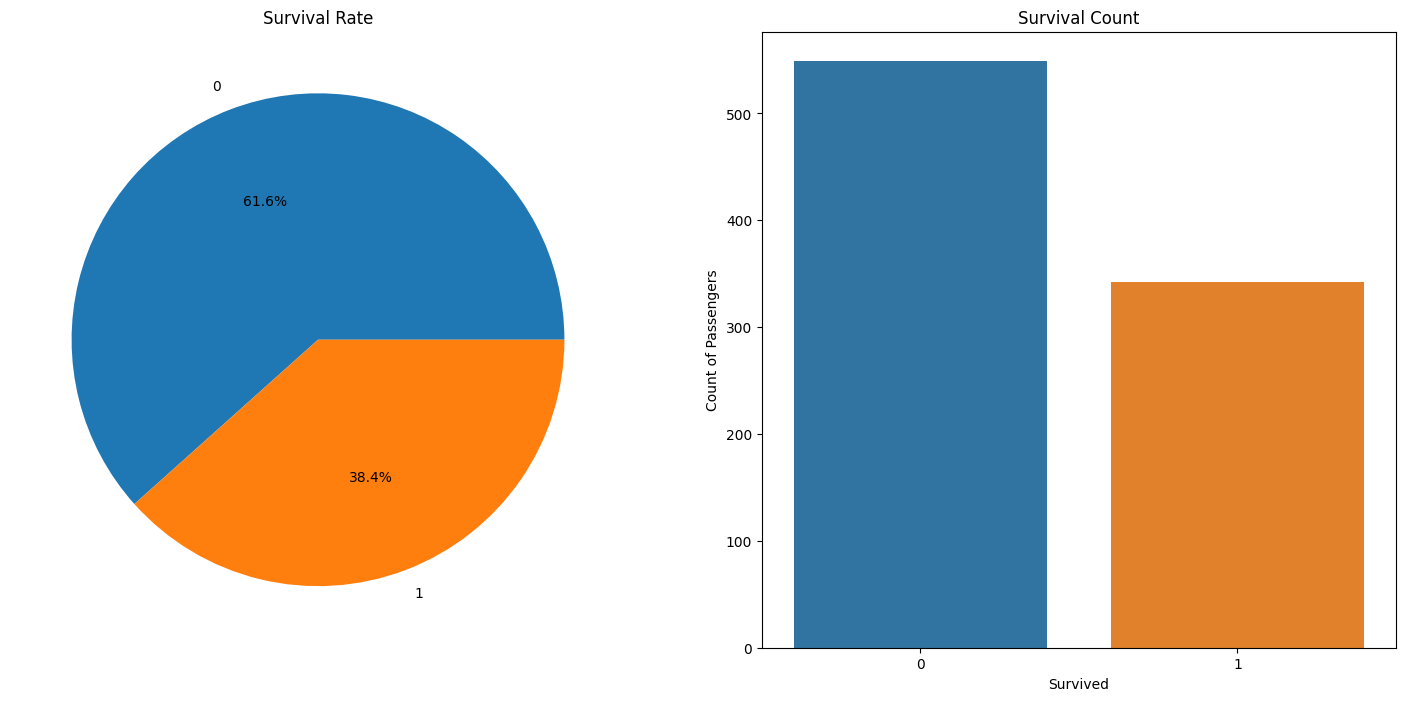

In [12]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train_data["Survived"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[0])
ax[0].set_title("Survival Rate")
ax[0].set_ylabel("")
sns.countplot(data=train_data,x="Survived",ax=ax[1])
ax[1].set_title("Survival Count")
ax[1].set_ylabel("Count of Passengers")

In [13]:
print("The min of age is ", train_data["Age"].min())
print("The min of age is ", train_data["Age"].median())
print("The min of age is ", train_data["Age"].max())

The min of age is  0.42
The min of age is  28.0
The min of age is  80.0


<Axes: xlabel='Age'>

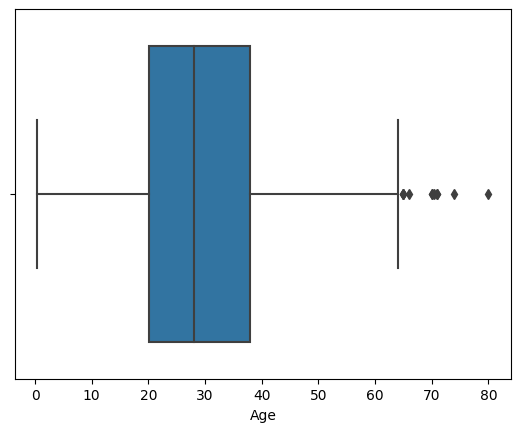

In [14]:
sns.boxplot(x=train_data["Age"])

#### The outliers are reasonable given that there can be elderly on the titanic ship. The minimum age is 0.42 from the table above. A large proportion 50 percentile are between 20 and 40 years old. The range seems quite huge from newborns to elderly, **though there is nothing wrong with the age column overall**

In [15]:
print("The min of age is ", train_data["Fare"].min())
print("The min of age is ", train_data["Fare"].median())
print("The min of age is ", train_data["Fare"].max())

The min of age is  0.0
The min of age is  14.4542
The min of age is  512.3292


<Axes: xlabel='Fare'>

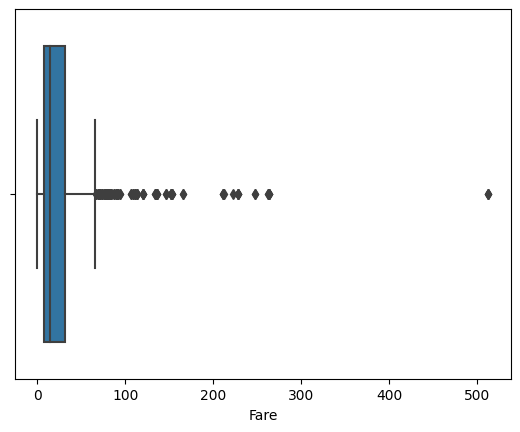

In [16]:
sns.boxplot(x=train_data["Fare"])

#### A large proportion of the fare is below 80, with a very large outlier having a fare of 500+. It may require some investigation later. Even then, it is possible for some fares to be extremely high, considering that these passengers may pay a premium for exclusive services. **Need to further check if the 500 plus fare is valid or a data entry error**

#### Seems to be skewed. Can follow up with **histogram** for a better understanding of distribution


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

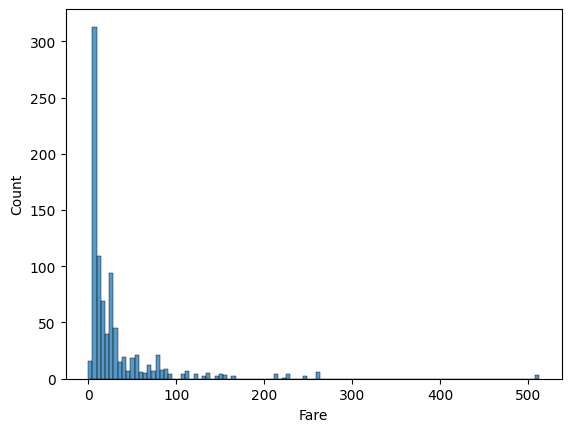

In [17]:
sns.histplot(data=train_data, x="Fare")

#### It is a skewed distribution. The histogram shows that even the largest fare price at about 500 plus is not orders of magnitude greater than the rest of the data points. There is **no need to apply log transform as additive change is considered to be more important than relative change**

In [18]:
train_data["Passenger_Class"].value_counts(normalize=True)

Passenger_Class
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

<Axes: xlabel='Passenger_Class', ylabel='count'>

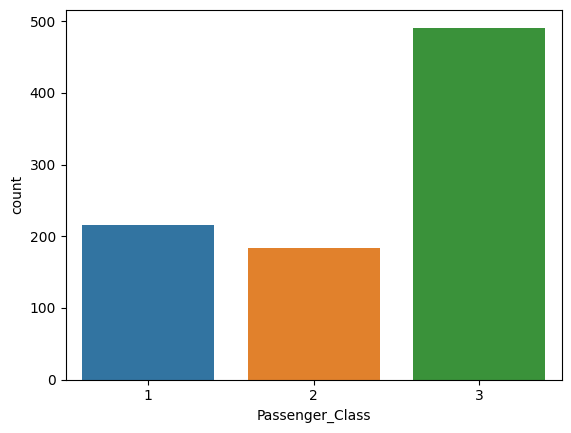

In [19]:
sns.countplot(train_data,x="Passenger_Class")

#### A large percentage of passengers belong to class 3, whereas passengers are approximately evenly split between class 1 and 2

In [20]:
train_data["Embarked"].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

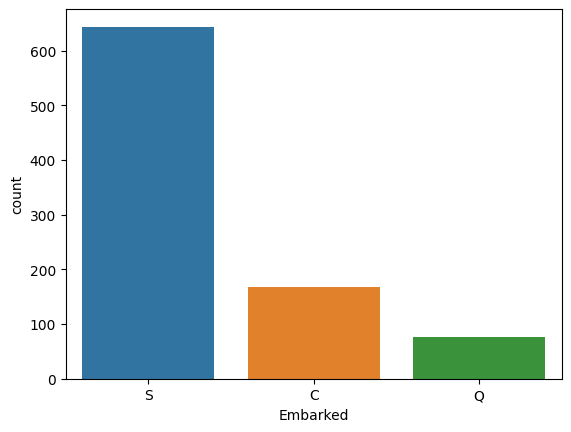

In [21]:
sns.countplot(train_data,x="Embarked")

#### A large percentage embarked from S port

In [22]:
train_data["Sex"].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

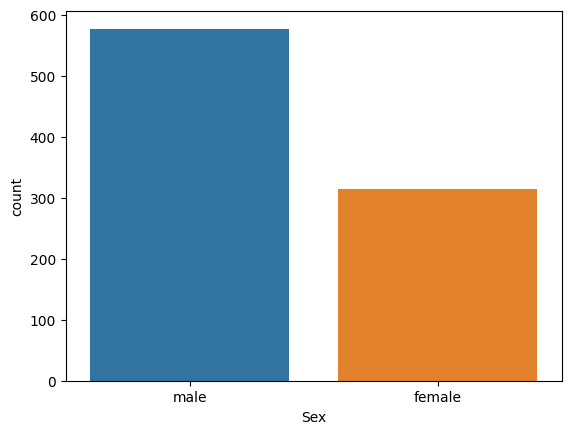

In [23]:
sns.countplot(train_data,x="Sex")

#### There is 2x male more than female

## Multivariate Analysis

#### Categorical Feature - Sex

In [24]:
train_data.groupby(['Sex','Survived'])[["Survived"]].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [25]:
women = train_data.loc[train_data["Sex"] == "female"]["Survived"]
rate = sum(women)/len(women)
rate

0.7420382165605095

In [26]:
men = train_data.loc[train_data["Sex"] == "male"]["Survived"]
rate = sum(men)/len(men)
rate

0.18890814558058924

        Survived
Sex             
female  0.742038
male    0.188908


Text(0.5, 1.0, 'Sex vs Survival Count')

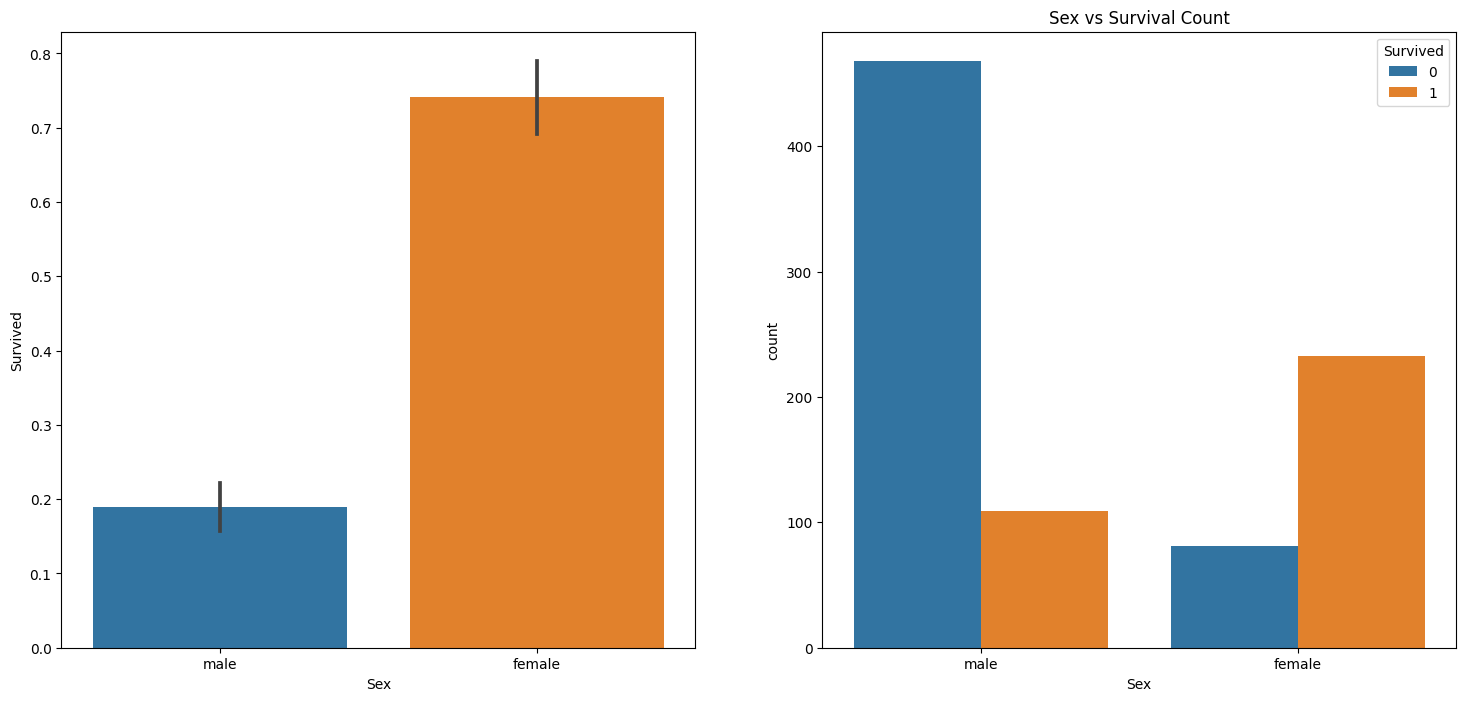

In [27]:
print(train_data[['Sex','Survived']].groupby(['Sex']).mean())
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.barplot(data=train_data,x="Sex",y="Survived",ax=ax[0])
sns.countplot(data=train_data,x="Sex",hue="Survived",ax=ax[1])
ax[1].set_title("Sex vs Survival Count")

#### Number of men on the ship is more than the number of female. **Yet, the proportion of female who survived is at least 2x (75%) more than the proportion of male. (20%)**

#### **It seems to be a very important feature for modelling as the sex of a passenger influecnes their survival rate. Women are prioritised in the rescue**

#### Categorical Feature (Ordinal) - PClass

In [28]:
pd.crosstab(train_data.Passenger_Class,train_data.Survived,
            margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Passenger_Class,,
1,80,136
2,97,87
3,372,119


                 Survived
Passenger_Class          
1                0.629630
2                0.472826
3                0.242363


Text(0.5, 1.0, 'PClass: Survived vs Dead')

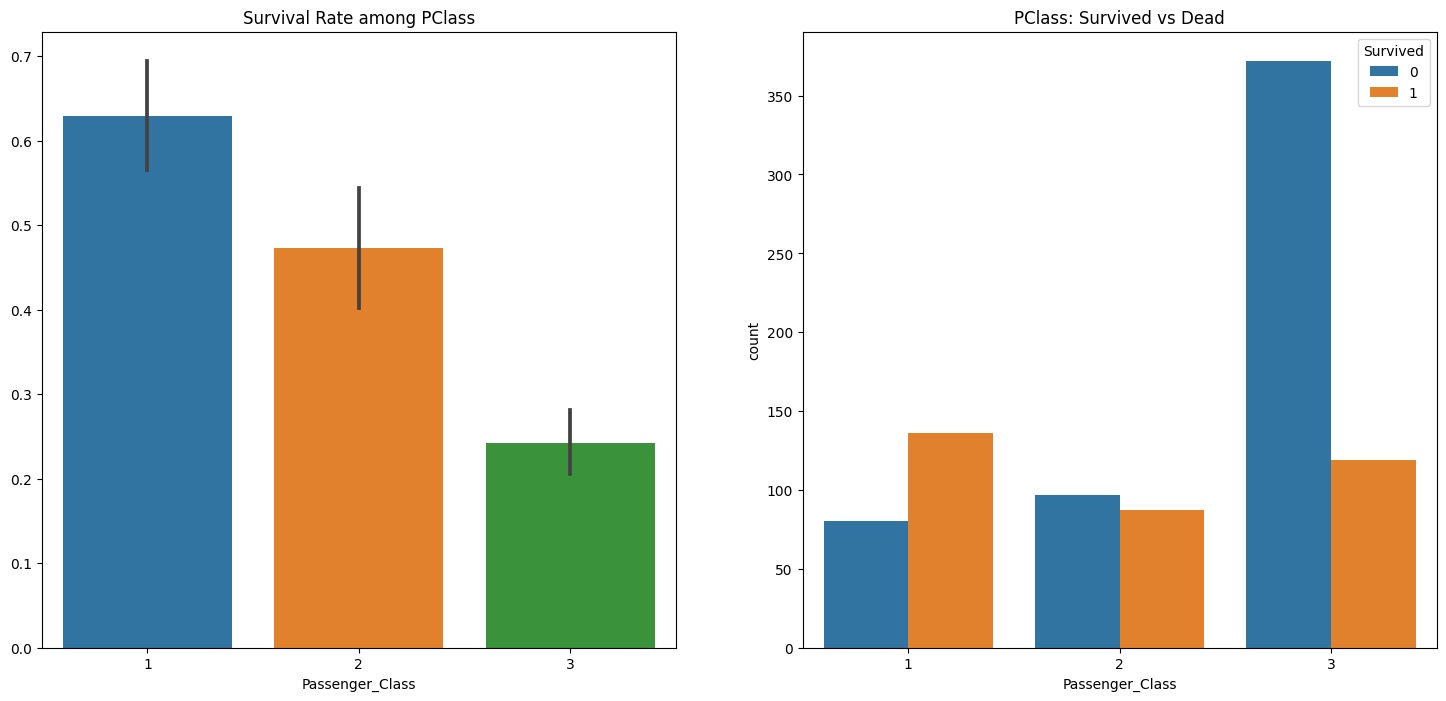

In [29]:
print(train_data.groupby(["Passenger_Class"])[["Survived"]].mean())
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.barplot(data=train_data,x="Passenger_Class",y="Survived",ax=ax[0])
ax[0].set_title("Survival Rate among PClass")
ax[0].set_ylabel("")
sns.countplot(data=train_data,x="Passenger_Class",hue="Survived",ax=ax[1])
ax[1].set_title("PClass: Survived vs Dead")

#### The survival rate for PClass 1 is the highest among all passenger classes. These passengers were given a **very high priority during the rescue.**

#### However, the survival rate for Pclass 3 is considered to be very low even though there is a large proportion of passengers from Pclass 3

#### **The class of a passenger affects his/her survival rate as passengers from class 1 could be more influential and wealthier. As such, their rescue could be prioritised**

### Check for Survival Rate with PClass and Sex

In [30]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Passenger_Class,
            margins=True).style.background_gradient(cmap='summer_r')

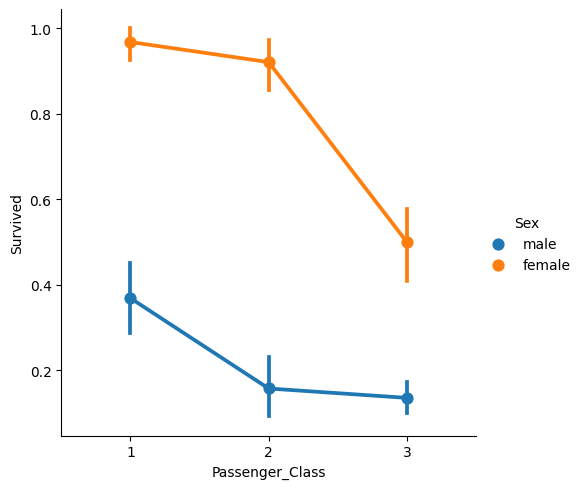

In [31]:
sns.catplot(data=train_data, x="Passenger_Class", y="Survived",hue="Sex",kind="point")

#### Women tends to have higher survival chances compared to men, especially for women from class 1 and 2. Nonetheless, women still have significantly higher chances of survival compared to men across all passenger classes.

#### **Reinforces the notion that passenger classes and sex are important factors in determining survival of passengers.**

### Continuous Feature - Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

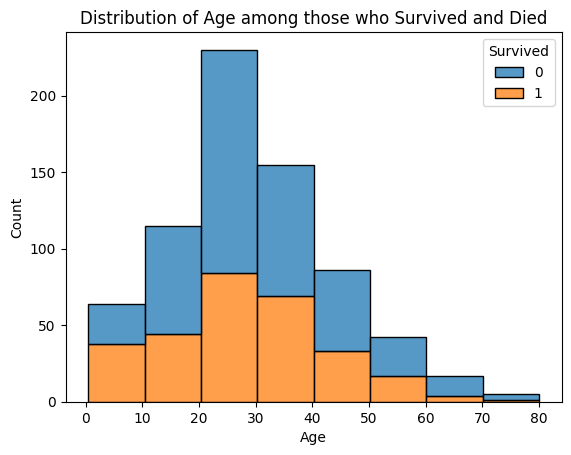

In [32]:
ax = sns.histplot(data=train_data, x="Age", hue="Survived", multiple="stack",bins=8)
ax.set_title("Distribution of Age among those who Survived and Died")
plt.show()

#### The survival rate for children (< 10 years old) seems optimistic, whereas the survival rate of teenagers and adults from 12 to 40 years seems low. 

#### **Age does affect the survival chances of the passengers.**

### Check for Survival Rate with Age & PClass and Age & Sex

Text(0.5, 1.0, 'Sex and Age vs Survived')

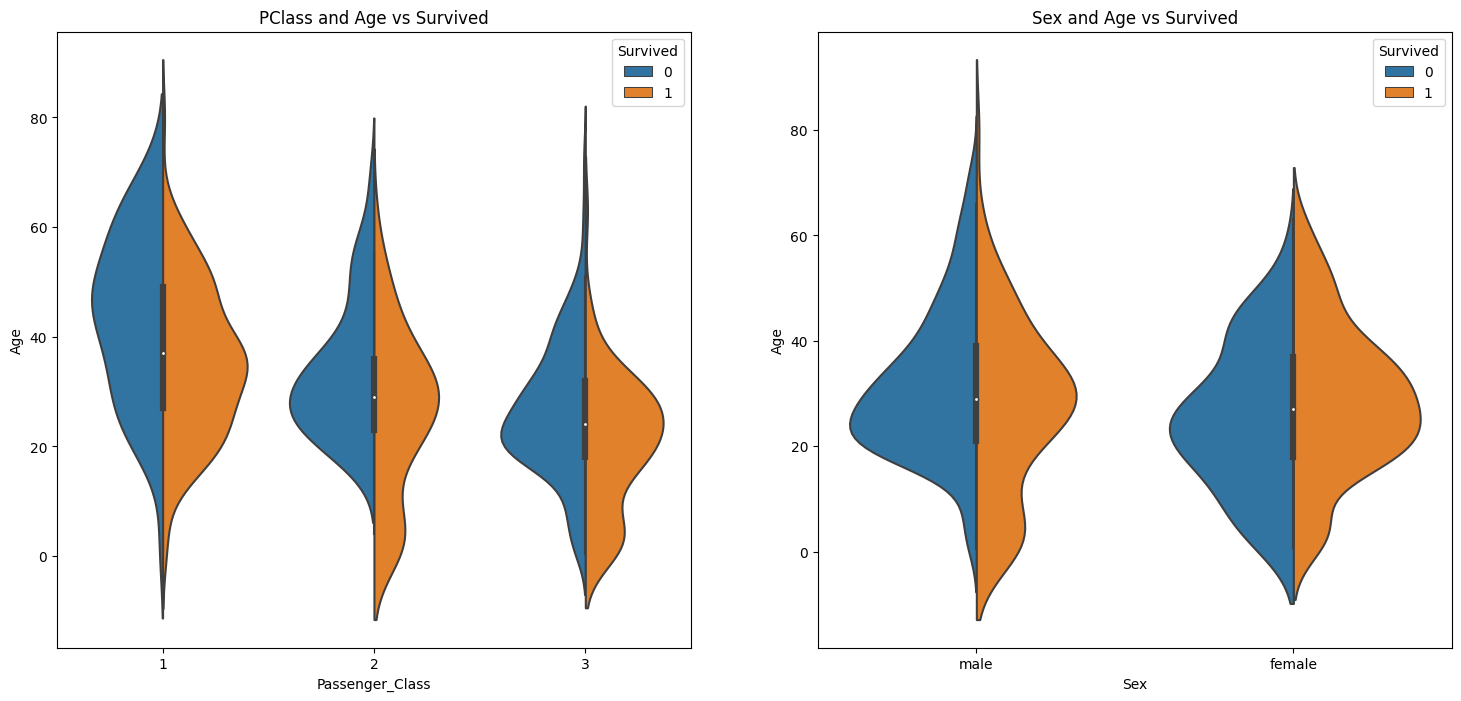

In [33]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=train_data, x="Passenger_Class", y="Age", hue="Survived"
               ,split=True,ax=ax[0])
ax[0].set_title("PClass and Age vs Survived")
sns.violinplot(data=train_data, x="Sex", y="Age", hue="Survived"
               ,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")

#### Children across all the passenger classes have a high survival rate.
#### Survival chances for passengers aged 20 - 50 from passenger class 1 has a higher chacne of survival when compared to passengers aged 20 - 50 from passenger class 2 and 3. 
#### Women has a higher chance of survival than men. The survival chances of men decreases with age.

### Categorical Feature (Nominal) - Port of Embarkment

In [34]:
print(train_data.groupby(["Embarked"])["Survived"].mean())
pd.crosstab(train_data.Embarked,train_data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


<Axes: xlabel='Embarked', ylabel='Survived'>

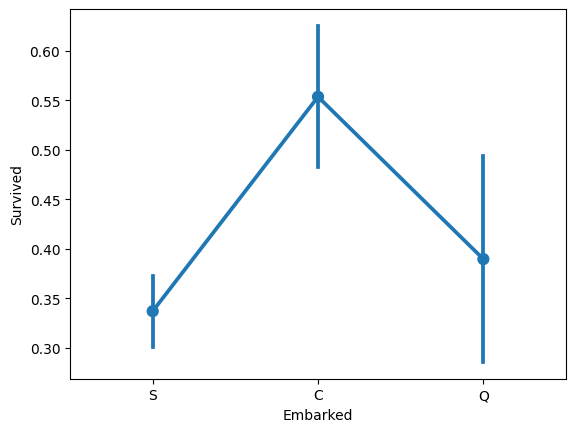

In [35]:
sns.pointplot(data=train_data,x="Embarked",y="Survived")

In [36]:
pd.crosstab([train_data.Embarked,train_data.Passenger_Class],[train_data.Sex,
            train_data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Text(0.5, 1.0, 'Classes of Passengers among the Ports')

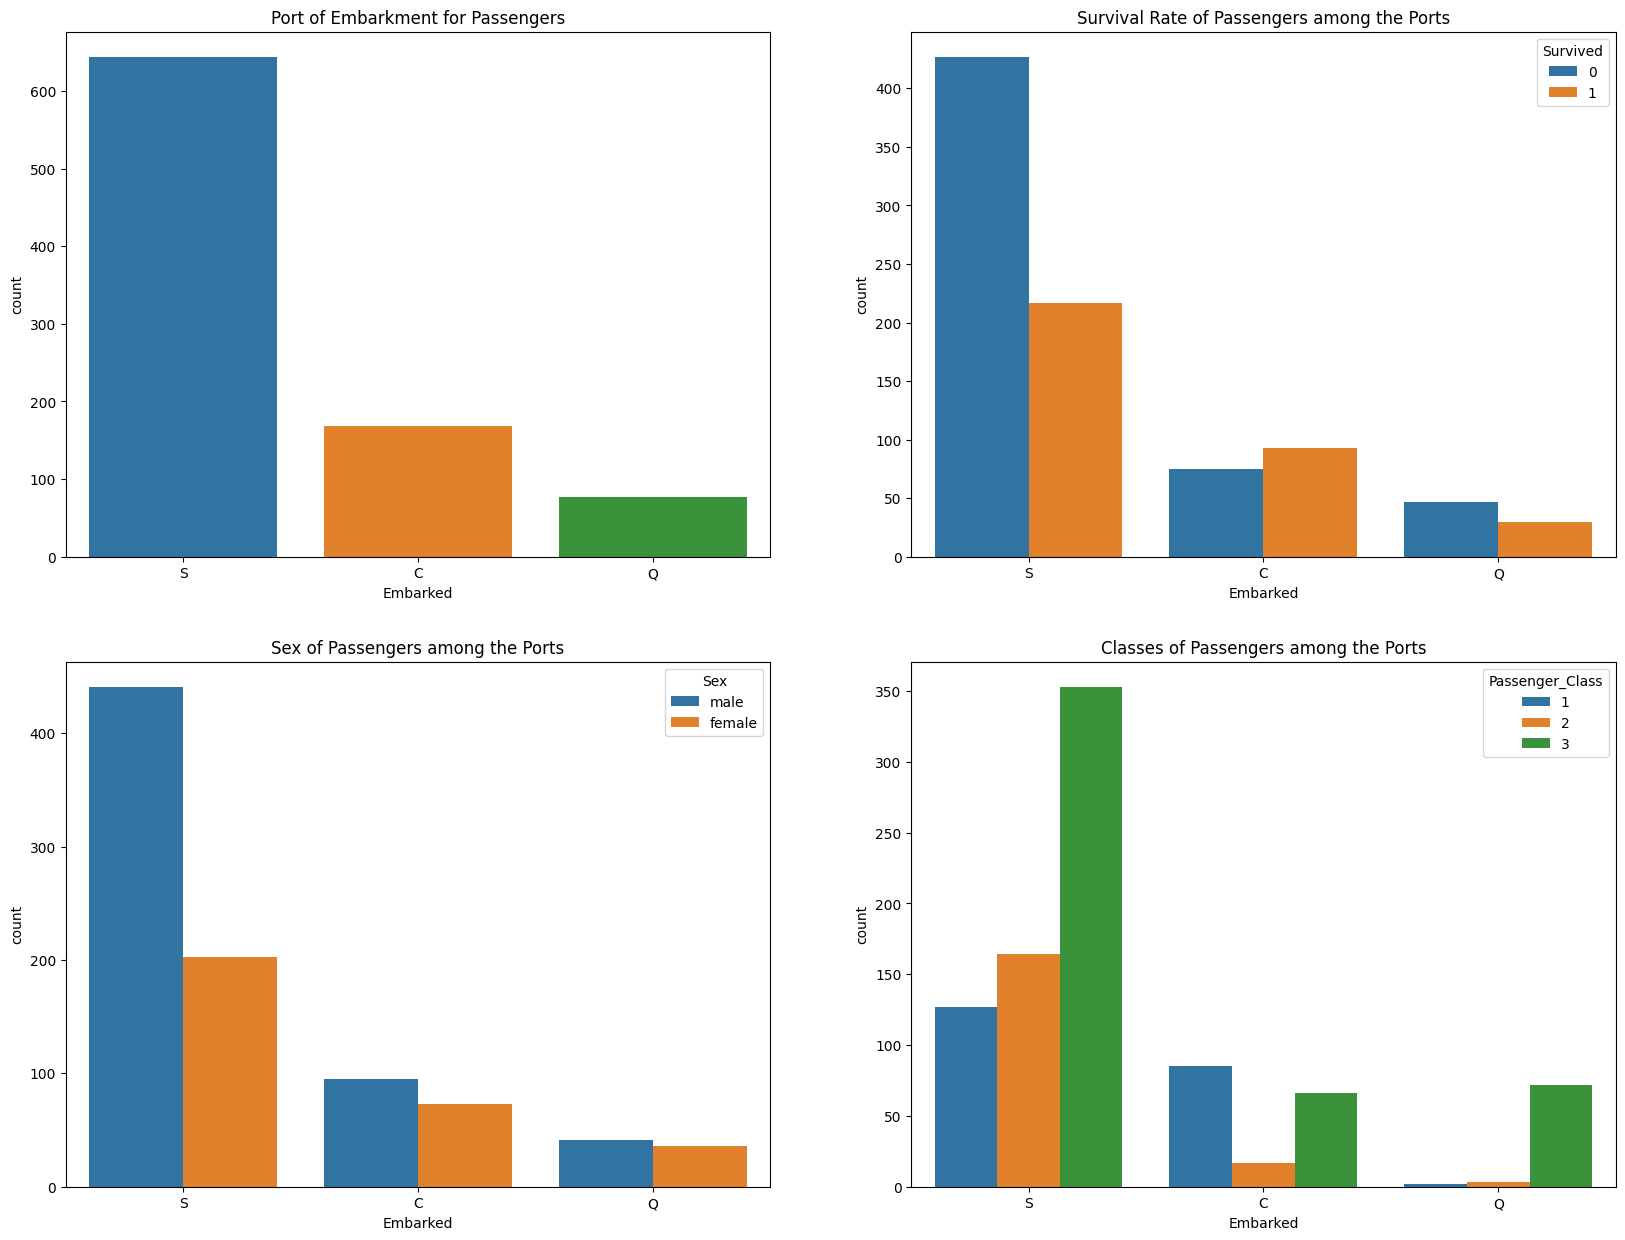

In [37]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(data=train_data,x="Embarked",ax=ax[0,0])
ax[0,0].set_title("Port of Embarkment for Passengers")
sns.countplot(data=train_data,x="Embarked",hue="Survived",ax=ax[0,1])
ax[0,1].set_title("Survival Rate of Passengers among the Ports")
sns.countplot(data=train_data,x="Embarked",hue="Sex",ax=ax[1,0])
ax[1,0].set_title("Sex of Passengers among the Ports")
sns.countplot(data=train_data,x="Embarked",hue="Passenger_Class",ax=ax[1,1])
ax[1,1].set_title("Classes of Passengers among the Ports")

#### Passengers who boarded from Port C has a higher survival chacne compared to the rest, even though the proportion of females at all the ports are lower than the proportion of males.
#### There is a higher number of passengers who belong to class 1 that board at Port C compared to S. This could explain why the survival rate of passenger who belong to class C is higher compared to the survival rate of passengers who belong to S.

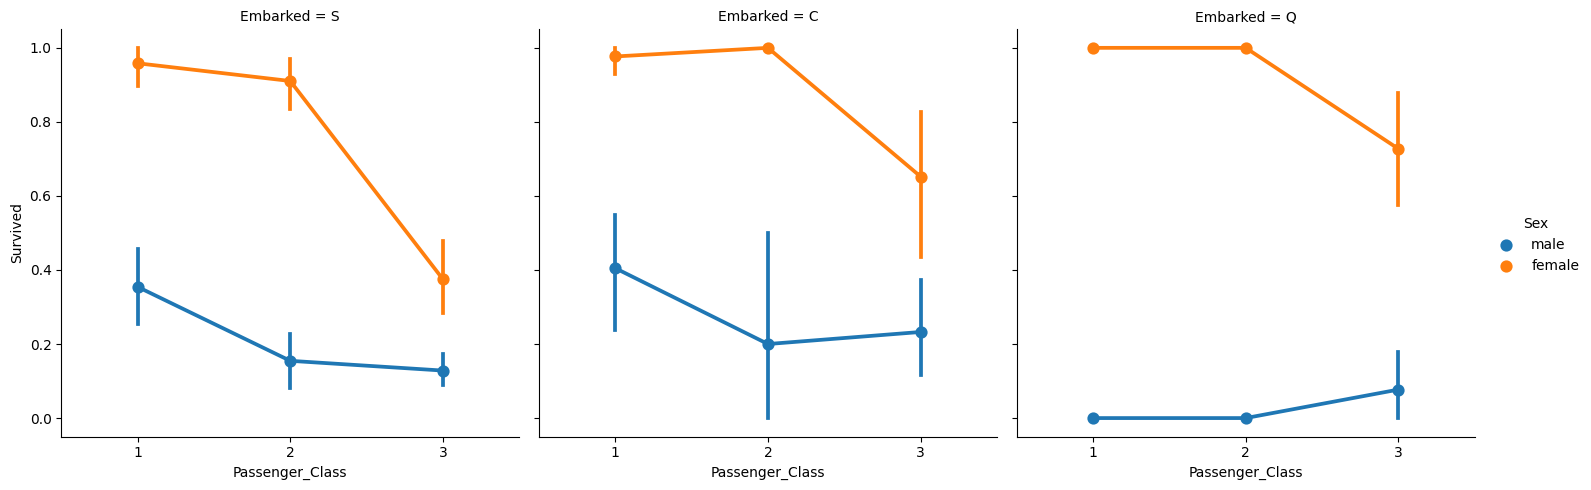

In [38]:
sns.catplot(data=train_data,x="Passenger_Class",y="Survived",hue="Sex",
            col="Embarked",kind="point")
plt.show()

#### The survival rates of females are consistently higher across all ports.
#### The survival rates of passengers from class 3 at port S is significantly lower than the passengers from class 1 and 2. 

### Sibling Spouse Feature - Continuous Discrete

In [39]:
print(train_data.groupby("Sibling_Spouse")["Survived"].mean())
pd.crosstab(train_data.Sibling_Spouse,
            train_data.Survived).style.background_gradient(cmap='summer_r')

Sibling_Spouse
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Survived,0,1
Sibling_Spouse,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'No. of Siblings & Spouses vs Survival')

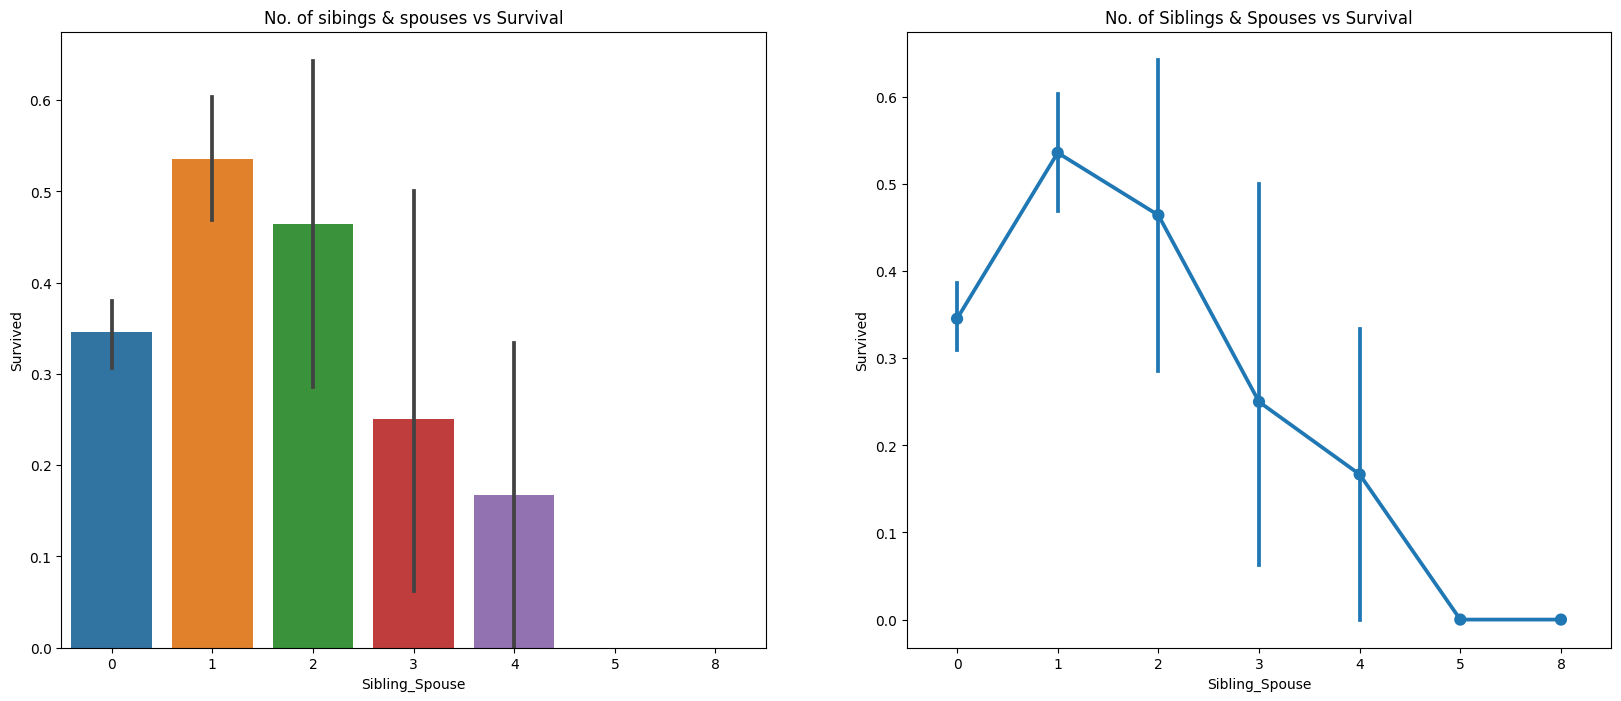

In [40]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=train_data,x="Sibling_Spouse",y="Survived",ax=ax[0])
ax[0].set_title("No. of sibings & spouses vs Survival")
sns.pointplot(data=train_data,x='Sibling_Spouse',y='Survived',ax=ax[1])
ax[1].set_title('No. of Siblings & Spouses vs Survival')

In [41]:
pd.crosstab(train_data.Sibling_Spouse,
            train_data.Embarked).style.background_gradient(cmap='summer_r')

Embarked,C,Q,S
Sibling_Spouse,,,
0,109,59,438
1,53,11,145
2,6,3,19
3,0,0,16
4,0,4,14
5,0,0,5
8,0,0,7


In [42]:
pd.crosstab(train_data.Sibling_Spouse,
            train_data.Passenger_Class).style.background_gradient(cmap='summer_r')

Passenger_Class,1,2,3
Sibling_Spouse,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### The survival rate decreases for large families who have high number of accompanying siblings or spouses that are travelling on the titanic.
#### The survival rate seems to be higher for passengers with smaller families such as those who have 1 or 2 siblings or spouses that they are travelling with.
#### However, the survival rate for those who are presumably alone without any siblings or spouses is also considered lower than those who have 1 or 2 siblings or spouses.
#### Passengers with large families are all from class 3 and as such their rescue may not be prioritised when compared to those with are more influential or wealthier. The port of Embarked closely relates to the passenger classes, but it is the passenger class that should intuitively influence survival chances more.

### Parent Children Feature - Continuous Discrete

In [43]:
print(train_data.groupby("Parent_Children")["Survived"].mean())
pd.crosstab(train_data.Parent_Children,
            train_data.Survived).style.background_gradient(cmap='summer_r')

Parent_Children
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Survived,0,1
Parent_Children,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Text(0.5, 1.0, 'No. of Parent & Children vs Survival')

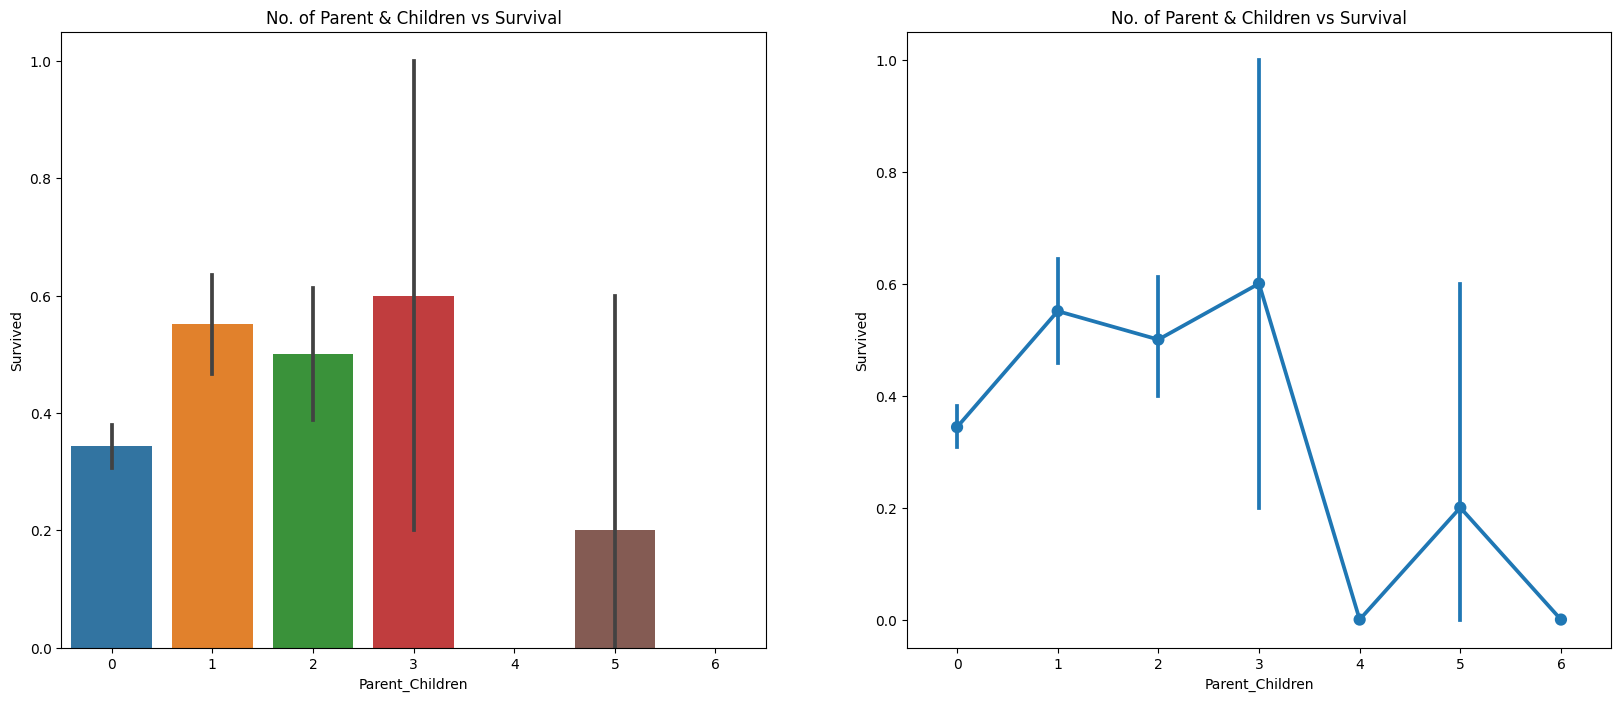

In [44]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=train_data,x="Parent_Children",y="Survived",ax=ax[0])
ax[0].set_title("No. of Parent & Children vs Survival")
sns.pointplot(data=train_data,x='Parent_Children',y='Survived',ax=ax[1])
ax[1].set_title('No. of Parent & Children vs Survival')

#### The chances of survival are higher for passengers who have the number of parents and children to be between 1 and 3 compared to those who have too many such as from 4 - 6 and when compared to those who are presumably alone (0 parents and children who are onboard with them).

In [45]:
pd.crosstab(train_data.Parent_Children,
            train_data.Passenger_Class).style.background_gradient(cmap='summer_r')

Passenger_Class,1,2,3
Parent_Children,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


#### Again, the passengers with larger number of parents and children and therefore have larger families mostly belong to class 3. As such, their rescue may not be prioritised.

### Continuous Feature - Fare

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

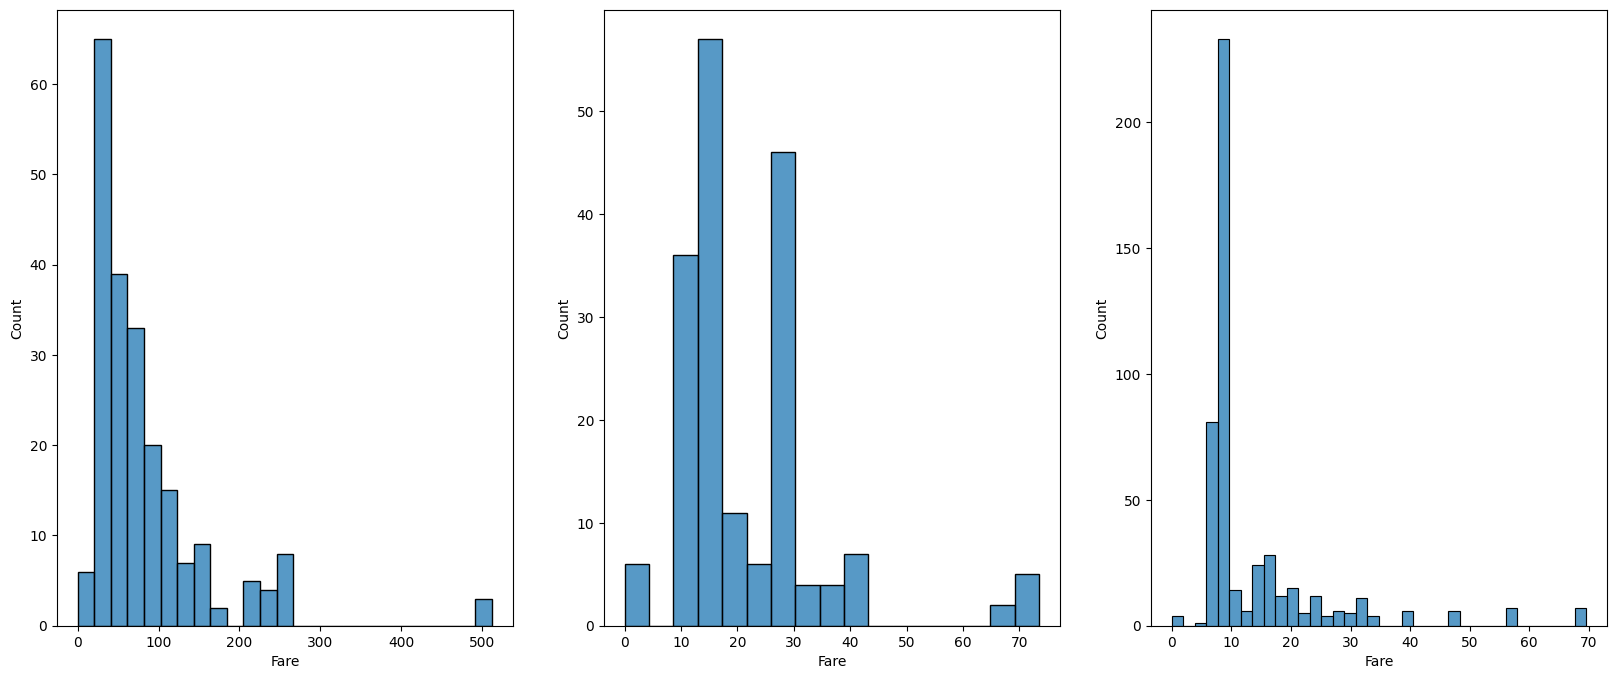

In [46]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.histplot(data=train_data[train_data["Passenger_Class"] == 1].Fare,ax=ax[0])
sns.histplot(data=train_data[train_data["Passenger_Class"] == 2].Fare,ax=ax[1])
sns.histplot(data=train_data[train_data["Passenger_Class"] == 3].Fare,ax=ax[2])
# f,ax=plt.subplots(1,3,figsize=(20,8))
# sns.distplot(train_data[train_data['Passenger_Class']==1].Fare,ax=ax[0])
# ax[0].set_title('Fares in Pclass 1')
# sns.distplot(train_data[train_data['Passenger_Class']==2].Fare,ax=ax[1])
# ax[1].set_title('Fares in Pclass 2')
# sns.distplot(train_data[train_data['Passenger_Class']==3].Fare,ax=ax[2])
# ax[2].set_title('Fares in Pclass 3')
# plt.show()

#### It is evident that the fares for class 3 is skewed lower compared to passengers class 2 and 3, highlighting that there can be differences in status,wealth and influences of passengers among the classes.

In [47]:
target = train_data["Survived"]
Y = target

In [48]:
features = ["Passenger_Class", "Sex", "Sibling_Spouse", "Parent_Children"]
train_data[features]

,Passenger_Class,Sex,Sibling_Spouse,Parent_Children
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
886,2,male,0,0
887,1,female,0,0
888,3,female,1,2
889,1,male,0,0


### Missing Values (EDA)

### Calculate the mean and the % of missing values 

In [49]:
ncounts = pd.DataFrame(train_data.isna().mean())
ncounts = ncounts.rename(columns={0:"train_missing"})
ncounts

,train_missing
PassengerId,0.000000
Survived,0.000000
Passenger_Class,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
Sibling_Spouse,0.000000
Parent_Children,0.000000
Ticket,0.000000
Fare,0.000000


<Axes: title={'center': '% of missing values'}>

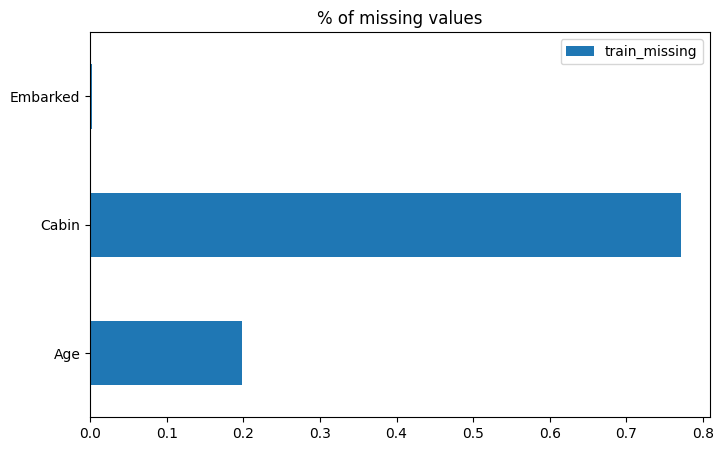

In [50]:
ncounts.query("train_missing > 0").plot(kind="barh",figsize=(8,5),
                                       title="% of missing values")

### **Cabin** has a large percentage of missing values, which warrants a removal of this feature since imputing such a feature will introduce large variacne and standard errors to the imputed feature.
### **Age** has a reasoanble percentage of missing values that allows for imputation
### **To be performed in Data Preprocessing Step**

## Data Preprocessing

### **Remove** irrelevant features or features that has a large percentage of missing values

### Using domian knowledge, remove the **passengerID** unique identifier feature from the dataset since it does not logically contribute to the predictive power of determining the passengers' survival.
### Remove the **ticket feature** as it appears to be a random no./string that does not add value to predicting the survival column
### Remove **Cabin feature** as it has a large percentage of missing values as discussed.

In [51]:
train_data.drop(["PassengerId","Ticket","Cabin"],axis=1,inplace=True)
print(train_data.columns)
print(train_data.head())

Index(['Survived', 'Passenger_Class', 'Name', 'Sex', 'Age', 'Sibling_Spouse',
       'Parent_Children', 'Fare', 'Embarked'],
      dtype='object')
   Survived  Passenger_Class  \
0         0                3   
1         1                1   
2         1                3   
3         1                1   
4         0                3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   Sibling_Spouse  Parent_Children     Fare Embarked  
0               1                0   7.2500        S  
1               1                0  71.2833        C  
2               0                0   7.9250        S  
3               1  

### **Mode Imputation for Embarked column**
### Impute Embarked column oof as it only has 2 missing values. The chance of data leakage is minimal with 2 rows imputation.

In [52]:
train_data["Embarked"].dropna().value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### S is overwhelmingly the majority category. Even if it is done in cv, there is a very high chacne the mode imputation will be S. 

In [53]:
frequent_embarked = train_data["Embarked"].dropna().mode().iloc[0]
frequent_embarked

'S'

In [54]:
train_data['Embarked'] = train_data['Embarked'].fillna(frequent_embarked)
train_data.isna().sum()

Survived             0
Passenger_Class      0
Name                 0
Sex                  0
Age                177
Sibling_Spouse       0
Parent_Children      0
Fare                 0
Embarked             0
dtype: int64

### Embarked now does not have any missing values

### **Encode** the string categories into numbers/integers for downstream ml models. Use OHE for encoding nominal data.

### Label Encoding for tree models (e.g. RFs, XGBoost)
### OHE for linear models (non-tree based)

In [55]:
train_data["Sex"] = train_data["Sex"].replace(["male","female"],[0,1])
train_data["Embarked"] = train_data["Embarked"].replace(["S","C","Q"],[0,1,2])

# creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(train_data[["Embarked"]]).toarray())
# enc_df.columns = enc.get_feature_names_out()
# train_data = train_data.join(enc_df)
# train_data.drop(["Embarked"],axis=1,inplace=True)
# train_data.head()

/tmp/ipykernel_33/1726890876.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["Sex"] = train_data["Sex"].replace(["male","female"],[0,1])
/tmp/ipykernel_33/1726890876.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["Embarked"] = train_data["Embarked"].replace(["S","C","Q"],[0,1,2])


### **Feature Engineering** 
### **Fare feature** - Explore if there is any non-linearity between fare feature and survival prediction, with the possibility of modelling the non-linearity with higher order terms.
### Check the non-linearity using the mean of the survival among the various fare bands.

In [56]:
train_data['FareBand'] = pd.cut(train_data['Fare'], 12)
train_data.head()

,Survived,Passenger_Class,Name,Sex,Age,Sibling_Spouse,Parent_Children,Fare,Embarked,FareBand
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,"(-0.512, 42.694]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,"(42.694, 85.388]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,"(-0.512, 42.694]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,"(42.694, 85.388]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,"(-0.512, 42.694]"


In [57]:
train_data[["FareBand","Survived"]].groupby(["FareBand"]).mean()

/tmp/ipykernel_33/3408169053.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[["FareBand","Survived"]].groupby(["FareBand"]).mean()


,Survived
FareBand,
"(-0.512, 42.694]",0.320833
"(42.694, 85.388]",0.571429
"(85.388, 128.082]",0.821429
"(128.082, 170.776]",0.777778
"(170.776, 213.47]",0.750000
"(213.47, 256.165]",0.571429
"(256.165, 298.859]",0.666667
"(298.859, 341.553]",NaN
"(341.553, 384.247]",NaN


### From the fare bands above, there is indeed a **non-linear relationship** between the discretised fare predictor variable and survived target variable.
### Include a higher order non-linear term **Fare^sq** in the dataset oof since there is no data leakage.

In [58]:
train_data["Fare_Squared"] = train_data["Fare"]**2
train_data.drop(["FareBand"],axis=1,inplace=True)
print(train_data["Fare_Squared"].head())
print('-'*50)
print(train_data["Fare"].head())
print('-'*50)

0      52.562500
1    5081.308859
2      62.805625
3    2819.610000
4      64.802500
Name: Fare_Squared, dtype: float64
--------------------------------------------------
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64
--------------------------------------------------


### **Age Feature** - Similar to fare feature, check for non-linearity between age feature and survived target variable using the non-missing values as a "true" distribution. If there is non-lienarity and feature engineering aims to capture that, the engineered feature can be implemented after missing values imputation.

In [59]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 12)
train_data['AgeBand'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: AgeBand
Non-Null Count  Dtype   
--------------  -----   
714 non-null    category
dtypes: category(1)
memory usage: 1.5 KB


In [60]:
train_data[["AgeBand","Survived"]].groupby(["AgeBand"]).mean()

/tmp/ipykernel_33/541907987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[["AgeBand","Survived"]].groupby(["AgeBand"]).mean()


,Survived
AgeBand,
"(0.34, 7.052]",0.680000
"(7.052, 13.683]",0.380952
"(13.683, 20.315]",0.370370
"(20.315, 26.947]",0.342857
"(26.947, 33.578]",0.416667
"(33.578, 40.21]",0.445545
"(40.21, 46.842]",0.326923
"(46.842, 53.473]",0.458333
"(53.473, 60.105]",0.392857


In [61]:
train_data.drop(["AgeBand"],axis=1,inplace=True)
train_data.loc[train_data["Age"]<= 16, "AgeBand"] = 0
train_data.loc[(train_data["Age"]> 16) & (train_data["Age"] <=40), "AgeBand"] = 1
train_data.loc[(train_data["Age"]> 40) & (train_data["Age"] <=60), "AgeBand"] = 2
train_data.loc[(train_data["Age"]> 60) & (train_data["Age"] <=90), "AgeBand"] = 3

In [62]:
print(train_data.head())
print('-'*50)
train_data[["AgeBand","Survived"]].groupby(["AgeBand"]).mean()

   Survived  Passenger_Class  \
0         0                3   
1         1                1   
2         1                3   
3         1                1   
4         0                3   

                                                Name  Sex   Age  \
0                            Braund, Mr. Owen Harris    0  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
2                             Heikkinen, Miss. Laina    1  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
4                           Allen, Mr. William Henry    0  35.0   

   Sibling_Spouse  Parent_Children     Fare  Embarked  Fare_Squared  AgeBand  
0               1                0   7.2500         0     52.562500      1.0  
1               1                0  71.2833         1   5081.308859      1.0  
2               0                0   7.9250         0     62.805625      1.0  
3               1                0  53.1000         0   2819.610000      1.0  
4        

,Survived
AgeBand,
0.0,0.550000
1.0,0.387931
2.0,0.390625
3.0,0.227273


### From both the tables, it appears that age is **non-linearly correlated** with survived. **Feature Engineering (binning of age variable)** is to be performed after missing value imputation using MI in cv and not oof, lest there is leakage.

### **Engineer new features - Family Size + isAlone** using both **Sibling Spouse** & **Parent Children** feature.
### **Family size** can be a logical feature to engineer and thus provides clearer signal to the model although it is a **linear combination** of both **Sibling Spouse** and **Parent Children**. 
### **isAlone** is also a very logical feature that can provide some greater insights since when a passenger is alone, his survivability can be an upswing (does not need to sacrifice himself for his/her family) or downswing (group survivability vs individual survivability). **Non-linear combination**
### Performed before cv since it is row-wise engineering.

In [63]:
#Creation of family size feature
train_data["Family_Size"] = 0
train_data["Family_Size"] = train_data["Sibling_Spouse"] + train_data["Parent_Children"]
#Creation of binary isAlone feature
train_data["Alone"] = 0
train_data.loc[train_data.Family_Size == 0,"Alone"] = 1
train_data.head()

,Survived,Passenger_Class,Name,Sex,Age,Sibling_Spouse,Parent_Children,Fare,Embarked,Fare_Squared,AgeBand,Family_Size,Alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,52.562500,1.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,5081.308859,1.0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,62.805625,1.0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2819.610000,1.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,64.802500,1.0,0,1


### **EDA** of newly constructed features **family size** & **is Alone**.

Text(0.5, 1.0, 'isAlone vs Survival')

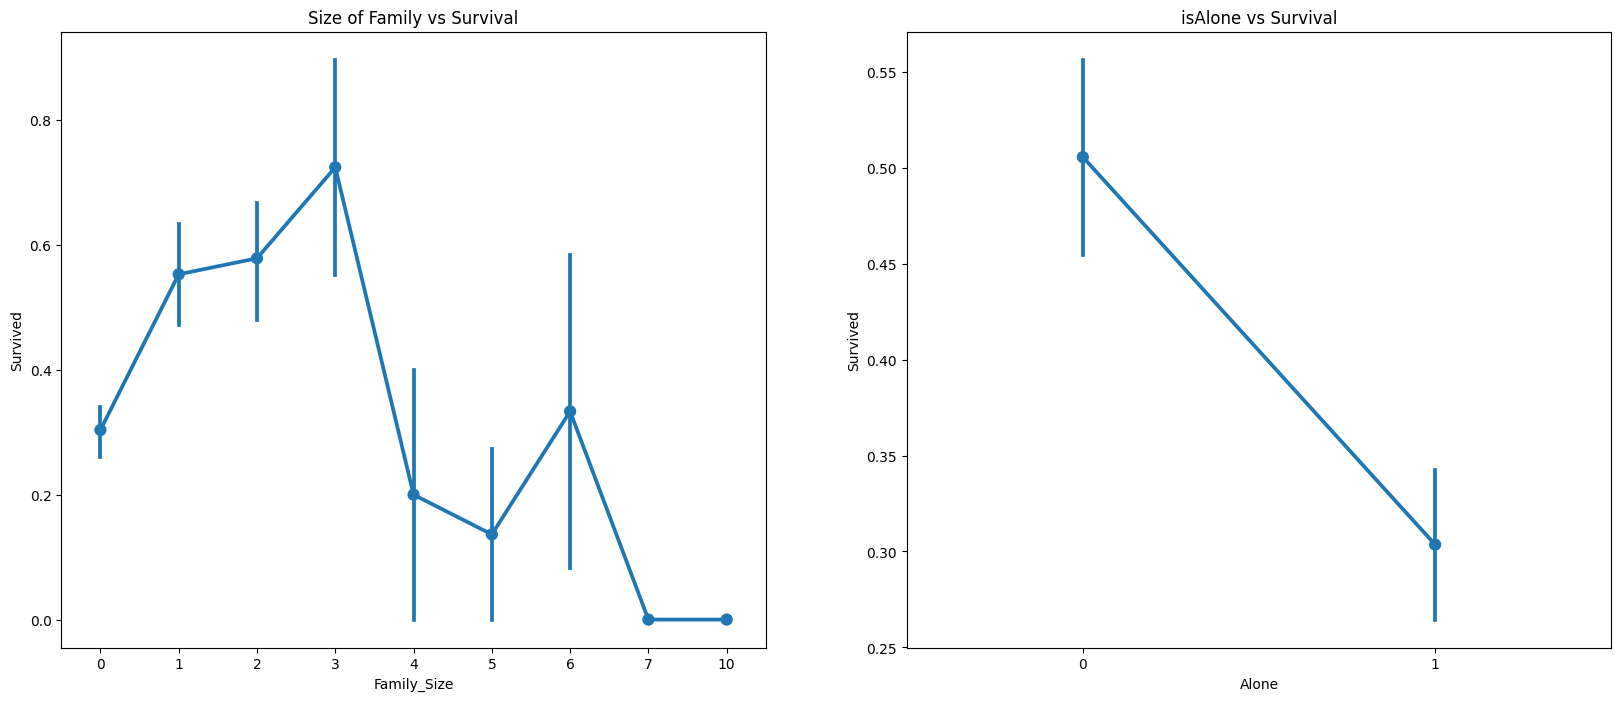

In [64]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.pointplot(data=train_data,x='Family_Size',y='Survived',ax=ax[0])
ax[0].set_title('Size of Family vs Survival')
sns.pointplot(data=train_data,x='Alone',y='Survived',ax=ax[1])
ax[1].set_title('isAlone vs Survival')

### When the passenger is alone without any family onboard, his/her chances of survival is very low.
### Family size of greater than or equal to 4 is lower compared to family size of less than or equal to 3.

In [65]:
train_data = train_data.drop(["Sibling_Spouse"],axis=1)
train_data.head()

,Survived,Passenger_Class,Name,Sex,Age,Parent_Children,Fare,Embarked,Fare_Squared,AgeBand,Family_Size,Alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,0,7.2500,0,52.562500,1.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,71.2833,1,5081.308859,1.0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,7.9250,0,62.805625,1.0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,53.1000,0,2819.610000,1.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,8.0500,0,64.802500,1.0,0,1


## Model Building

### Establish baselines for binary classification

### **Start with Non-Model Building baselines** Coin Flip & Most frequent Class (Trivial benchmarks for sanity check)

### For Coin flip, the models should not be lower than 50%, which would mean it performs worse than random guessing.

### For most frequent class, the accuracy on whole train set is 61.6%. However, it can be implemented in cv folds to obtain a more accurate score.

In [66]:
train_data.head()

,Survived,Passenger_Class,Name,Sex,Age,Parent_Children,Fare,Embarked,Fare_Squared,AgeBand,Family_Size,Alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,0,7.2500,0,52.562500,1.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,71.2833,1,5081.308859,1.0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,7.9250,0,62.805625,1.0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,53.1000,0,2819.610000,1.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,8.0500,0,64.802500,1.0,0,1


In [67]:
#Split train data into X and Y
X_train = train_data.iloc[:,1:]
Y_train = train_data.iloc[:,0]
Y_train.head()
X_train

,Passenger_Class,Name,Sex,Age,Parent_Children,Fare,Embarked,Fare_Squared,AgeBand,Family_Size,Alone
0,3,"Braund, Mr. Owen Harris",0,22.0,0,7.2500,0,52.562500,1.0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,71.2833,1,5081.308859,1.0,1,0
2,3,"Heikkinen, Miss. Laina",1,26.0,0,7.9250,0,62.805625,1.0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,53.1000,0,2819.610000,1.0,1,0
4,3,"Allen, Mr. William Henry",0,35.0,0,8.0500,0,64.802500,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,27.0,0,13.0000,0,169.000000,1.0,0,1
887,1,"Graham, Miss. Margaret Edith",1,19.0,0,30.0000,0,900.000000,1.0,0,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,2,23.4500,0,549.902500,NaN,3,0
889,1,"Behr, Mr. Karl Howell",0,26.0,0,30.0000,1,900.000000,1.0,0,1


In [68]:
most_frequent_classifier = DummyClassifier(strategy="most_frequent")

cv_results_most_frequent = cross_validate(estimator=most_frequent_classifier,X=X_train,y=Y_train,cv=5)
np.mean(cv_results_most_frequent['test_score'])

0.6161634548992531

### The mean of the cv scores tallies closely with the 61.6% mentioned. There is no significant difference and the 61.6% can be reported as such for most frequent baseline score.

### **Xgboost baseline model**

In [69]:
train_base_data = train_data.copy()
train_base_data.head()

,Survived,Passenger_Class,Name,Sex,Age,Parent_Children,Fare,Embarked,Fare_Squared,AgeBand,Family_Size,Alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,0,7.2500,0,52.562500,1.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,71.2833,1,5081.308859,1.0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,7.9250,0,62.805625,1.0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,53.1000,0,2819.610000,1.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,8.0500,0,64.802500,1.0,0,1


### Remove engineered features for baseline model. Encodings remain for use with xgboost. Features such as cabin and passenger id which were removed earlier remains since these features do not add predictive power to the model

In [70]:
train_base_data.drop(["Fare_Squared","AgeBand","Family_Size","Alone","Embarked","Name"],axis=1,inplace=True)
train_base_data.head()

,Survived,Passenger_Class,Sex,Age,Parent_Children,Fare
0,0,3,0,22.0,0,7.2500
1,1,1,1,38.0,0,71.2833
2,1,3,1,26.0,0,7.9250
3,1,1,1,35.0,0,53.1000
4,0,3,0,35.0,0,8.0500


In [71]:
#Split train data into X and Y
X_train = train_base_data.iloc[:,1:]
Y_train = train_base_data.iloc[:,0]
print(Y_train.head())
X_train

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


,Passenger_Class,Sex,Age,Parent_Children,Fare
0,3,0,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,3,1,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,3,0,35.0,0,8.0500
...,...,...,...,...,...
886,2,0,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,3,1,NaN,2,23.4500
889,1,0,26.0,0,30.0000


In [72]:
print(X_train.dtypes)

Passenger_Class      int64
Sex                  int64
Age                float64
Parent_Children      int64
Fare               float64
dtype: object


In [73]:
xgb = XGBClassifier()
np.mean(cross_val_score(xgb, X_train, Y_train, cv=5))

0.8215805661917017

### The XGBoost baseline model has accuracy score of 82% which is quite good, considering that it uses primarily raw features.

### Test whether the newly engineered features provide more information and increase the predictive power of the model.

In [74]:
#Split train data into X and Y
X_train = train_data.iloc[:,1:]
Y_train = train_data.iloc[:,0]
print(Y_train.head())
X_train.drop(["Name"],axis=1,inplace=True)
X_train

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


,Passenger_Class,Sex,Age,Parent_Children,Fare,Embarked,Fare_Squared,AgeBand,Family_Size,Alone
0,3,0,22.0,0,7.2500,0,52.562500,1.0,1,0
1,1,1,38.0,0,71.2833,1,5081.308859,1.0,1,0
2,3,1,26.0,0,7.9250,0,62.805625,1.0,0,1
3,1,1,35.0,0,53.1000,0,2819.610000,1.0,1,0
4,3,0,35.0,0,8.0500,0,64.802500,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,13.0000,0,169.000000,1.0,0,1
887,1,1,19.0,0,30.0000,0,900.000000,1.0,0,1
888,3,1,NaN,2,23.4500,0,549.902500,NaN,3,0
889,1,0,26.0,0,30.0000,1,900.000000,1.0,0,1


In [75]:
xgb = XGBClassifier()
np.mean(cross_val_score(xgb, X_train, Y_train, cv=5))

0.8226978846274559

### There is an extremely slight improvement (~0.001) improvement of the XGBoost model

### Compare other models with XGBoost.

In [76]:
kf = KFold(n_splits=5)
cv_mean = []
cv_std = []
cv_accuracies = []
classifier_names = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree',
                    'Naive Bayes','Random Forest','XGBoost']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(),XGBClassifier()]
for model in models:
    #pipe = Pipeline([('mi', IterativeImputer(max_iter=10)),('model', model)])
    Iterative_imputer_estimator =  RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,
    )
    pipe = Pipeline([('mi', IterativeImputer(estimator=Iterative_imputer_estimator,max_iter=10)),('model', model)])
    results = cross_val_score(pipe,X_train,Y_train,cv=5,scoring="accuracy")
    cv_accuracies.append(results)
    cv_mean.append(np.mean(results))
    cv_std.append(np.std(results))
pd.DataFrame({'mean accuracy':cv_mean,'std accuracy':cv_std},index=classifier_names)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,mean accuracy,std accuracy
Linear Svm,0.762080,0.031173
Radial Svm,0.660015,0.038943
Logistic Regression,0.763160,0.043125
KNN,0.684678,0.034128
Decision Tree,0.774440,0.018193
Naive Bayes,0.683573,0.038963
Random Forest,0.810357,0.019554
XGBoost,0.814845,0.020398


<Axes: >

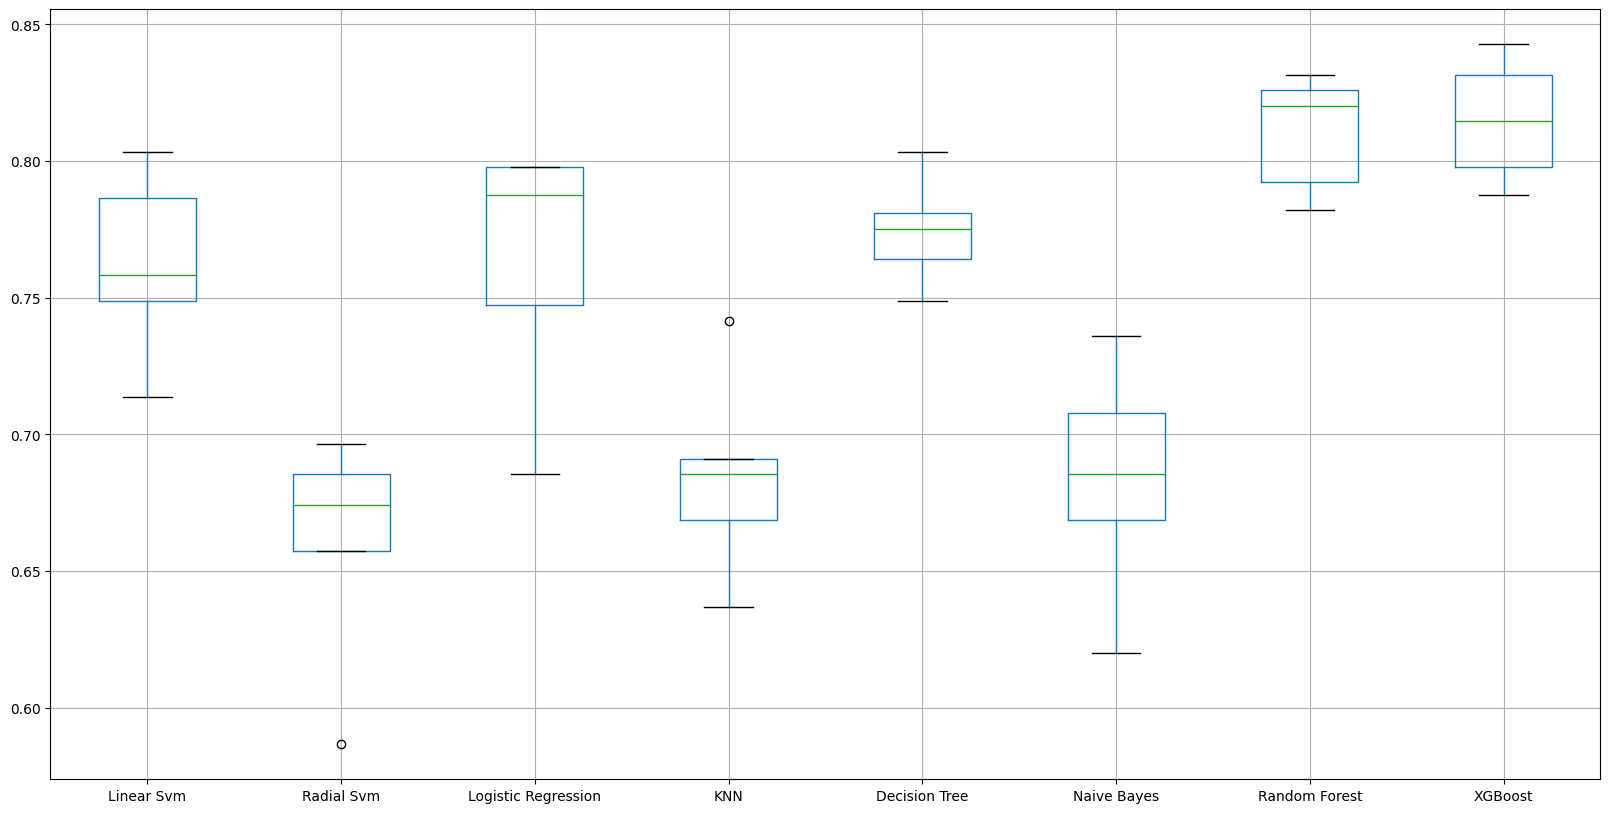

In [77]:
plt.subplots(figsize=(20,10))
accuracy_df = pd.DataFrame(cv_accuracies,index=classifier_names)
#Transpose of dataframe since boxplot is constructed from the columns axis
accuracy_df.T.boxplot()

                     mean accuracy  std accuracy
Linear Svm                0.762080      0.031173
Radial Svm                0.660015      0.038943
Logistic Regression       0.763160      0.043125
KNN                       0.684678      0.034128
Decision Tree             0.774440      0.018193
Naive Bayes               0.683573      0.038963
Random Forest             0.810357      0.019554
XGBoost                   0.814845      0.020398


<Axes: >

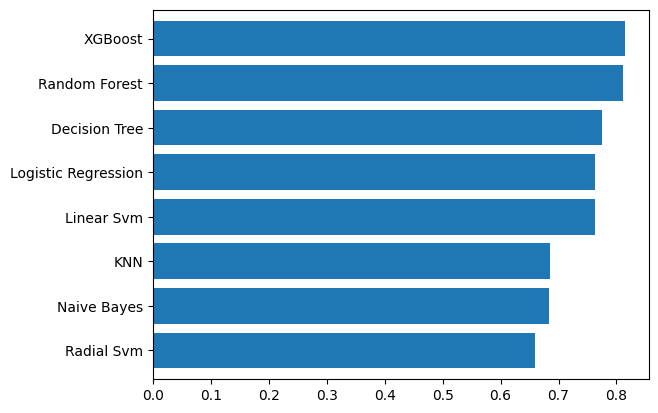

In [78]:
models_acc_df = pd.DataFrame({'mean accuracy':cv_mean,'std accuracy':cv_std},index=classifier_names)
print(models_acc_df)
models_acc_df["mean accuracy"].sort_values().plot.barh(width=0.8)

### Tree-base models performs better than the non tree-based models, which is not surprising.

In [79]:
pipe = Pipeline([('mi', IterativeImputer(max_iter=10)),('xgboost', XGBClassifier())])
results = cross_val_score(pipe,X_train,Y_train,cv=5)
np.mean(results)

0.8103320569957944

### Although multiple imputation is considered as one of the more advanced imputation methods, the performances of XGBoost and the other models are lower compared to the baseline XGBoost. 

### This means that XGBoost can handle missing values indepdently and does it even better when compared to multiple imputation.

### **Hyperparameter Tuning** Select the top 2 performing models for hyperparameter tuning

### Tune XGBoost (without MI)

In [80]:
parameters = {'n_estimators':[50,100,300,500,700,900,1000,1500], 'max_depth':[3,5, 10,15,20]}
grid = GridSearchCV(estimator=XGBClassifier(),param_grid=parameters,cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.cv_results_)

0.8350574351892537
{'max_depth': 3, 'n_estimators': 50}
{'mean_fit_time': array([0.05047789, 0.07544365, 0.20291448, 0.39727411, 0.50105081,
       0.58999248, 0.62082415, 0.9173131 , 0.06476984, 0.10585809,
       0.27316017, 0.43055019, 0.58240237, 0.73709741, 0.81284781,
       1.24587107, 0.11787572, 0.15665479, 0.39527197, 0.5699954 ,
       0.7346981 , 1.15619712, 1.11070967, 1.3513916 , 0.10998793,
       0.17671528, 0.38539767, 0.56464996, 0.72998247, 0.92176275,
       1.00112271, 1.35026183, 0.11078296, 0.17905335, 0.38903451,
       0.57287927, 0.73239722, 0.89528837, 0.98212652, 1.27278004]), 'std_fit_time': array([0.00261516, 0.00081668, 0.00518941, 0.0420679 , 0.0272445 ,
       0.02366178, 0.00884221, 0.00872172, 0.00231409, 0.00133507,
       0.00715045, 0.00559708, 0.00584756, 0.01201297, 0.00820129,
       0.06839395, 0.02513178, 0.00121765, 0.03045941, 0.02114351,
       0.04077145, 0.1313966 , 0.16540689, 0.03926291, 0.00190983,
       0.00735258, 0.01193939, 0.0153

### Tune RandomForestClassifier

In [81]:
pipe = Pipeline([('mi', IterativeImputer(max_iter=10)),('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':[50,100,150,200,250,300,350,400]}

grid = GridSearchCV(estimator=pipe,param_grid=parameters,cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.cv_results_)

0.8159688657334756
{'rf__n_estimators': 50}
{'mean_fit_time': array([0.25682034, 0.4656487 , 0.67189837, 0.88021092, 1.10712466,
       1.32845373, 1.55062771, 1.65870852]), 'std_fit_time': array([0.00302403, 0.00319408, 0.00730233, 0.00705174, 0.011579  ,
       0.01249928, 0.0027892 , 0.10703921]), 'mean_score_time': array([0.01335807, 0.02021847, 0.02667294, 0.0328918 , 0.03966632,
       0.04726033, 0.0531868 , 0.05413055]), 'std_score_time': array([0.00045745, 0.00085137, 0.00037822, 0.00092263, 0.00089703,
       0.00163259, 0.0015479 , 0.00917104]), 'param_rf__n_estimators': masked_array(data=[50, 100, 150, 200, 250, 300, 350, 400],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'rf__n_estimators': 50}, {'rf__n_estimators': 100}, {'rf__n_estimators': 150}, {'rf__n_estimators': 200}, {'rf__n_estimators': 250}, {'rf__n_estimators': 300}, {'rf__n_estimators': 350}, {'rf__n_estimators': 400}],

### **Hyperparameter Tuning Results**

### **1.** The best parameters tested for XGBoost using grid search has a mean score of 0.8350574351892537 with {'max_depth': 3, 'n_estimators': 50} params. 

### **2.** The best parameters tested for RandomForestClassifier using grid search has a mean score of 0.8159688657334756 with {'rf__n_estimators': 50} params.


### Continue to fit on the whole train data and measure once (at most twice) on the test set.